# Entrenamiento del modelo usando GD (Gradient Descent)
- Utilizaremos el algoritmo de Descenso del Gradiente.
- Este es el primero de tres algoritmos que usaremos para efectuar versiones alternativas del entrenamiento:
    1. ✅ GD (logreg_train.ipynb)
    2. ✅ SGD (logreg_sgd_train.ipynb)
    3. ✅ Mini-Batch GD (logreg_minibatch_train.ipynb) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # Añade el directorio padre al path
from src.ft_functions import softmax, compute_cost, predict, save_weights

### Leemos el DataSet de entrenamiento normalizado

In [2]:
# Para el entrenamiento solo necesitamos el Dataset train
df = pd.read_csv('../datasets/normal_train.csv')

## Variables del modelo

In [3]:
# 1. Crear la matriz y con todas las casas ya que estoy en un caso de clasificación multinomial
y = df[['House_Gryffindor', 'House_Hufflepuff', 'House_Ravenclaw', 'House_Slytherin']]

# 2. Seleccionar las características (X)
X = df[['Best Hand', 'Age', 'Herbology', 'Defense Against the Dark Arts',
        'Potions', 'Charms', 'Flying']]

# 3. Agregar columna de 1's para el término de sesgo (bias)
X = np.c_[np.ones(len(X)), X]

# Convertir a arrays de numpy para operaciones más eficientes
X = np.array(X)
y = np.array(y)

print("\nPrimeros 3 valores de X:")
print(X[:3])

print("\nPrimeros 3 valores de y:")
print(y[:3])


Primeros 3 valores de X:
[[ 1.          0.         -0.64873035  0.87996722  1.00749409 -0.69816049
   1.19974009 -0.4992794 ]
 [ 1.          1.         -0.32740279 -1.36481614  1.13059639  0.40759206
  -1.00452861 -1.38645949]
 [ 1.          0.         -0.36565607  1.26279717  0.77383265  0.88072797
   1.81945265  0.08810844]]

Primeros 3 valores de y:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


### Pesos iniciales aleatorios y Coste inicial

In [4]:
# Inicializar pesos aleatoriamente
W = np.random.randn(X.shape[1], y.shape[1]) * 0.01

# Calcular coste inicial
cost = compute_cost(X, y, W)
print(f"Coste inicial: {cost}")

Coste inicial: 1.3761449197618632


## Descenso del Gradiente
Para el caso multinomial, necesitamos adaptar la función de descenso del gradiente para manejar la matriz de pesos W en lugar del vector theta.

In [5]:
def gradient_descent_multinomial(X, y, learning_rate=0.1, num_iterations=1000, epsilon=1e-8):
    """
    Implementa el descenso del gradiente para regresión logística multinomial

    Parámetros:
    X: matriz de características (incluyendo columna de 1's) de forma (n_muestras, n_características)
    y: matriz one-hot de etiquetas reales de forma (n_muestras, n_clases)
    learning_rate: tasa de aprendizaje (alpha)
    num_iterations: número máximo de iteraciones
    epsilon: umbral para early stopping

    Retorna:
    W: matriz de pesos optimizada
    cost_history: lista con el valor de la función de pérdida en cada iteración
    """
    # Inicializar matriz de pesos W con valores pequeños aleatorios
    n_features = X.shape[1]
    n_classes = y.shape[1]
    W = np.random.randn(n_features, n_classes) * 0.01

    # Lista para guardar el historial de costes
    cost_history = []

    # Número de muestras
    m = X.shape[0]

    # Calcular coste inicial
    prev_cost = compute_cost(X, y, W)
    cost_history.append(prev_cost)

    # Descenso del gradiente
    for i in range(num_iterations):
        # Calcular predicciones actuales
        z = np.dot(X, W)
        h = softmax(z)

        # Calcular gradiente
        # El gradiente es (1/m) * X^T * (h - y)
        gradient = (1/m) * np.dot(X.T, (h - y))

        # Actualizar pesos
        W = W - learning_rate * gradient

        # Calcular nuevo coste
        current_cost = compute_cost(X, y, W)
        cost_history.append(current_cost)

        # Imprimir progreso cada 1000 iteraciones
        if i % 1000 == 0:
            print(f'Iteración {i}: Coste = {current_cost}')

        # Early stopping
        if abs(prev_cost - current_cost) < epsilon:
            print(f'\nConvergencia alcanzada en la iteración {i}')
            print(f'Diferencia en coste: {abs(prev_cost - current_cost)}')
            break

        prev_cost = current_cost

    return W, cost_history

# Ejemplo de uso:
W, cost_history = gradient_descent_multinomial(X, y)

Iteración 0: Coste = 1.286749319487201


Las principales diferencias con la versión binomial son:
- Inicializamos una matriz W en lugar de un vector theta
- El gradiente se calcula usando la fórmula para multinomial: (1/m) * X^T * (h - y)
    - h son las probabilidades softmax
    - La resta (h - y) se hace sobre todas las clases

No necesitamos una función compute_gradient separada, ya que el cálculo es más directo.  
Todas las operaciones matriciales están adaptadas para manejar múltiples clases.

## Entrenamiento del modelo

Para hacer predicciones con el modelo entrenado, usaremos la función predict.  
Lo ejecutaremos así:

In [6]:
# Hiperparámetros
learning_rate = 0.1
num_iterations = 5_000

# Ejecutar el descenso del gradiente multinomial
W_optimal, cost_history = gradient_descent_multinomial(X, y, learning_rate, num_iterations)

# Imprimir coste inicial y final
print(f"Coste inicial: {cost_history[0]}")
print(f"Coste final: {cost_history[-1]}")

# Hacer predicciones
probabilities = predict(X, W_optimal)

# Obtener la clase predicha
predicted_houses = np.argmax(probabilities, axis=1)
actual_houses = np.argmax(y, axis=1)
accuracy = np.mean(predicted_houses == actual_houses)
print(f"\nPrecisión del modelo: {accuracy:.4f}")

Iteración 0: Coste = 1.305445848602906
Iteración 1000: Coste = 0.1188334331049203
Iteración 2000: Coste = 0.1145154703268056
Iteración 3000: Coste = 0.1124576466547022
Iteración 4000: Coste = 0.11118154563610487
Coste inicial: 1.3979827692257443
Coste final: 0.11026628223649147

Precisión del modelo: 0.9831


## Visualización de la evolución del coste

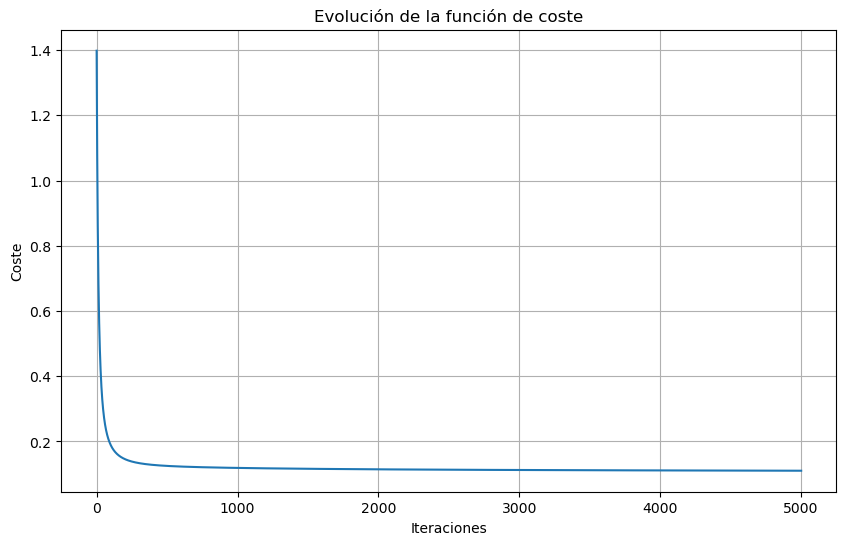

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Evolución de la función de coste')
plt.xlabel('Iteraciones')
plt.ylabel('Coste')
plt.grid(True)
plt.show()

## Visualizar pesos para cada característica

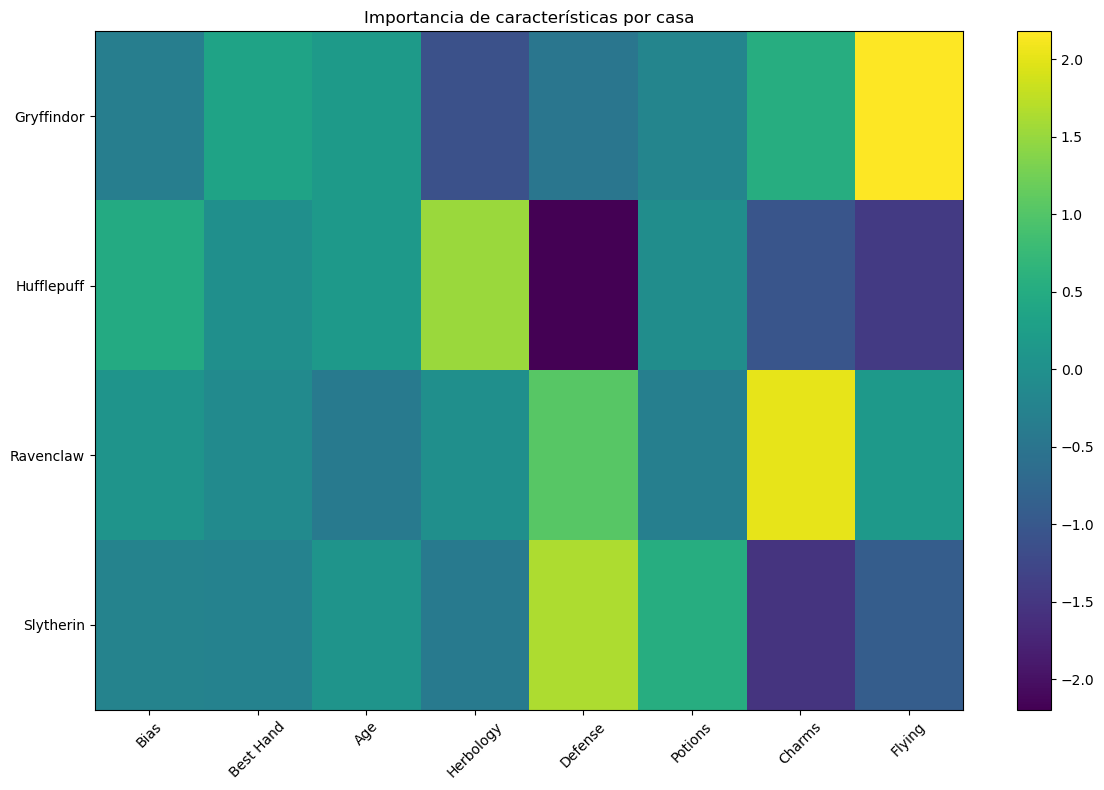

In [8]:
# visualiza la importancia de las diferentes características (features)
feature_names = ['Bias', 'Best Hand', 'Age', 'Herbology', 'Defense', 'Potions', 'Charms', 'Flying']
house_names = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

plt.figure(figsize=(12, 8))
plt.imshow(W_optimal.T, aspect='auto')
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.yticks(range(len(house_names)), house_names)
plt.title('Importancia de características por casa')
plt.tight_layout()
plt.show()

## Grabación de los pesos óptimos

In [9]:
# Después del entrenamiento ejecutamos la función
save_weights(W_optimal, '../output/model_weights.json')